In [1]:
%config IPCompleter.greedy = True
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

pd.set_option('mode.chained_assignment', None)
sn.set(rc={'figure.figsize':(9,9)})
sn.set(font_scale=1.4)

# Linear models for classification

Recap: Goal is to take input vector $\bf{x}$ and assign it to one of $K$ discrete classes $C_k$ where $k=1,\dots,K$.

For probabilistic models, for two-class problems, is the binary representation with the target $t\in\{0,1\}$, with $t=0$ representing class $C_1$ and $t=1$ representing class $C_2$. Hence $t=p(C_1)$

## Probabilistic Generative Models

Considering $C_1$ from two classes ($K=2$), the posterior probability is:

$$p(C_1|\bf{x})=\frac{p(\bf{x}|C_1)p(C_1)}{p(\bf{x}|C_1)p(C_1)+p(\bf{x}|C_2)p(C_2)}$$

Which when factored as the *logistic sigmoid* function
$$ \sigma(a) = \frac{1}{1+exp(-a)}$$

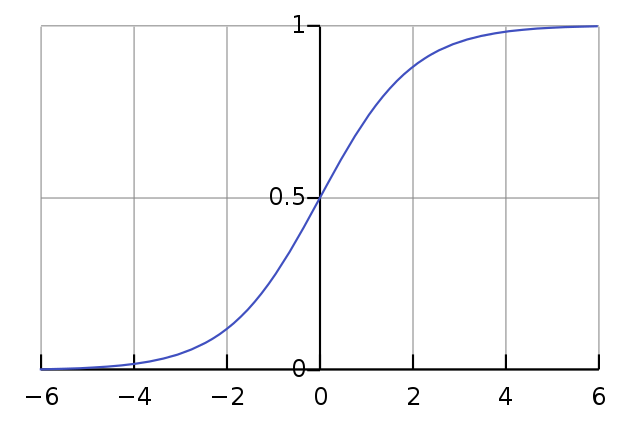

Where $$a=ln\frac{p(\bf{x}|C_1)p(C_1)}{p(\bf{x}|C_2)p(C_2)}$$

Considering case of $K>2$, we get:

$$p(C_k|\bf{x})=\frac{p(\bf{x}|C_k)p(C_k)}{\sum_j p(\bf{x}|C_j)p(C_j)}$$
$$ = \frac{exp(a_k)}{\sum_j exp(a_j)}$$

Known as the *softmax function* or the *normalised exponential*, and can be regarded as the multiclass generalization of the logisitic sigmoid.

Where $$ a_k = ln(p(\bf{x}|C_k)p(C_k))$$

# Logistic Regression

Two class classification, posterior probability of class $C_1$ can be written as a logistic sigmoid acting on a linear function of the feature vector $\phi$

$$ p(C_1|\phi)=y(\phi)=\sigma(\bf{w}^{T}\phi)$$

With $p(C_2|\phi)=1-p(C_1|\phi)$

Parameters $\bf{w}$ can be determined by maximum likelihood. (Can use the derivative of the logistic sigmoid function which is $\frac{d\sigma}{da}=\sigma(1-\sigma)$)


Starting with the likelihood function (Assuming all observations in the sample are independetly Bernoulli distributed).

$$ L(\bf{w}|\phi)=p(\bf{t}|\bf{w})=\prod_{n}y_{n}^{t_{n}}(1-y_{n})^{1-t_{n}}$$
Where $y_n = p(C_1|\phi_n)$

Maxising the likelihood function, can be done defining an error function to minimise by taking the negative log of the likelihood function.

I.e. the *cross-entropy* error function
$$ J(\bf{w})=-ln(\bf{t}|\bf{w})=-\sum_n (t_n ln y_n + (1-t_n) ln (1-y_n))$$

Differentiating the cost function with respect to $\bf{w}$ to obtain the differential is:

$$ \nabla J(\bf{w})=\sum_n (y_n -t_n)\phi_n$$

Which can be applied with a gradient descent optomisation algorithm

# Two Classes (Binary) Logisitc Regression

Example on the iris dataset, train a model for $p(C_{Virginica})$

Manipulating the dataset to use *One-vs-Rest Classification*

Performs best when training dataset is linearly seperable

Classes : ['setosa' 'versicolor' 'virginica']
Feature names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


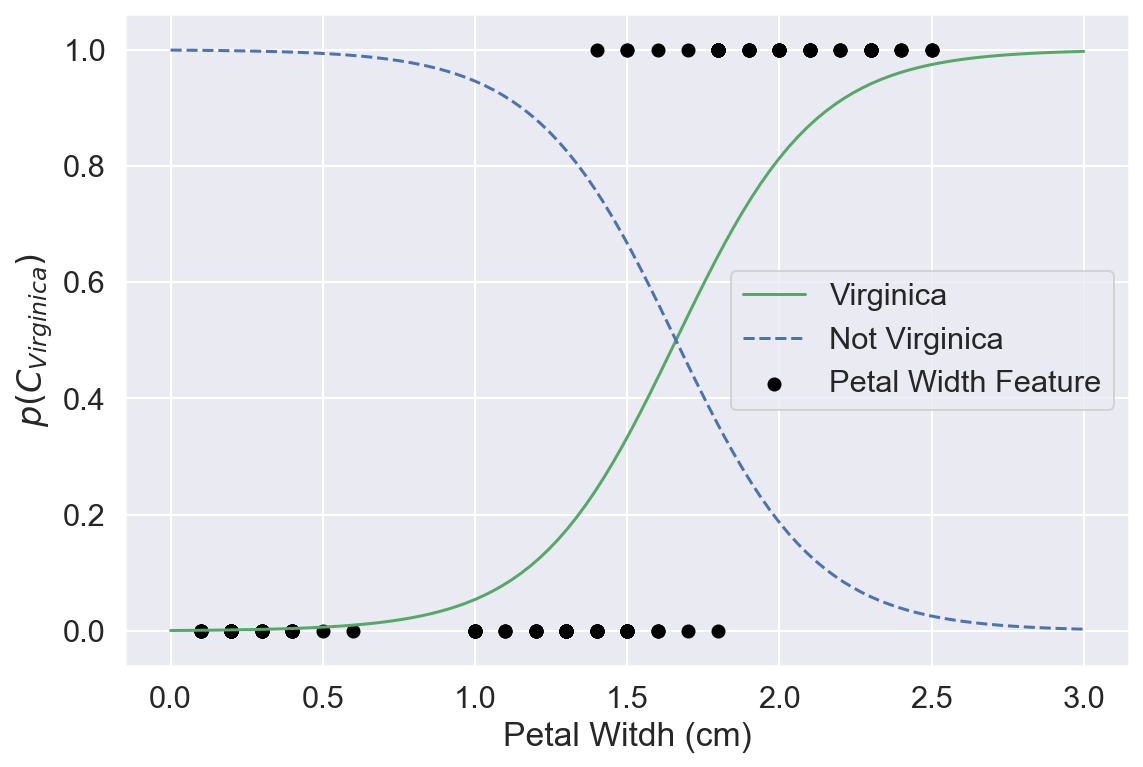

Training Accuracy : 96.0 



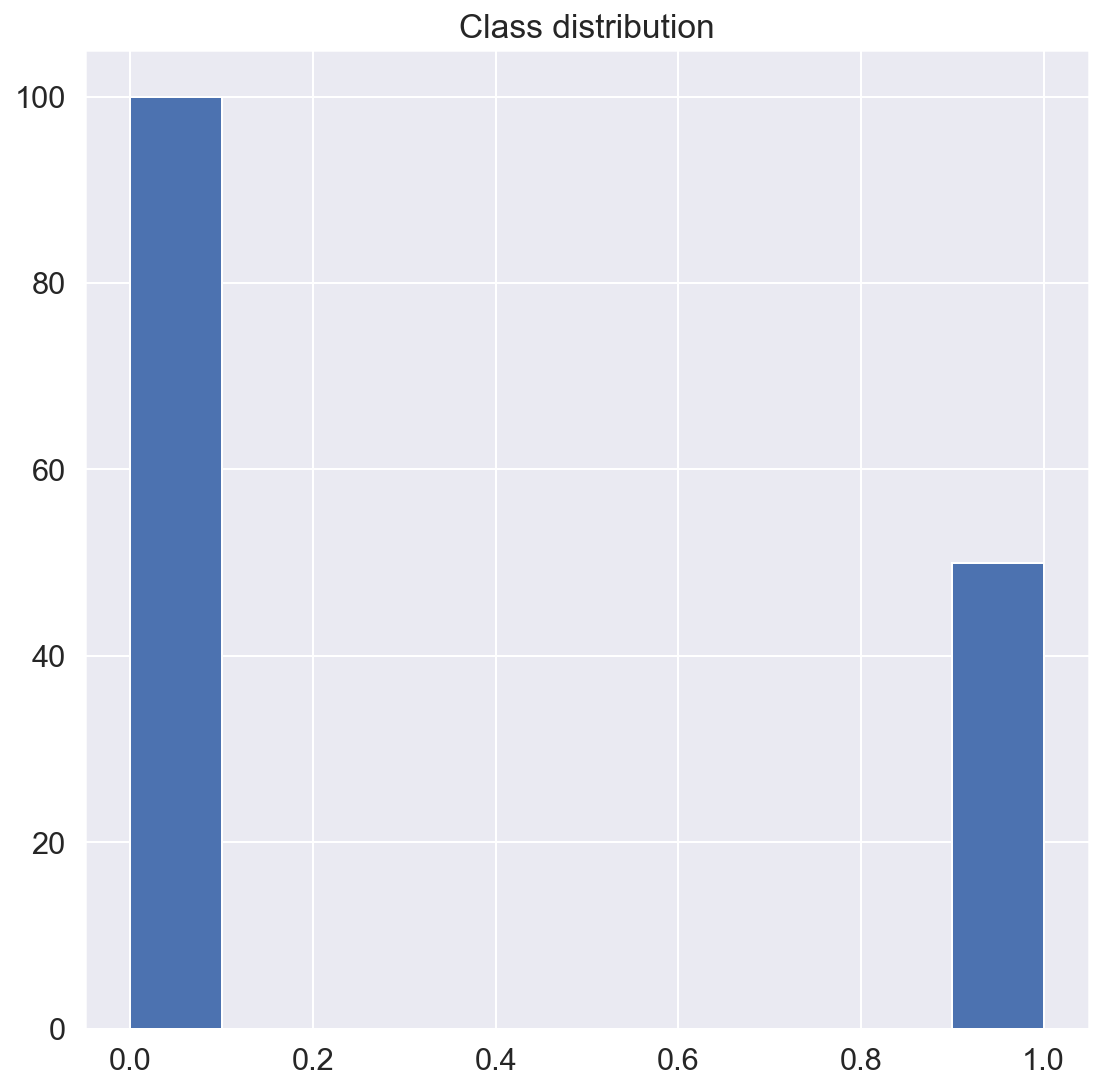

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets


def binary_logistic_regression():
    iris = datasets.load_iris()
    print('Classes : {}'.format(iris.target_names))
    print('Feature names : {}'.format(iris.feature_names))
    X = iris.data[:, 3:]  # Take petal length feature
    # 1 if class target Virginica, else 0 (For all other classes)
    Y = (iris.target == 2).astype(np.int)

    logreg = LogisticRegression(solver='lbfgs')
    logreg.fit(X, Y)

    X_graph = np.linspace(0, 3, 100).reshape(-1, 1)
    Y_proba = logreg.predict_proba(X_graph)
    plt.figure(figsize=(9, 6))
    plt.plot(X_graph, Y_proba[:, 1], 'g-', label='Virginica')
    plt.plot(X_graph, Y_proba[:, 0], 'b--', label='Not Virginica')
    plt.scatter(X.ravel(), Y, color='black', label='Petal Width Feature')
    plt.xlabel('Petal Witdh (cm)')
    plt.ylabel('$p(C_{Virginica})$')
    plt.legend()
    plt.show()

    Y_train_predict = logreg.predict(X)
    print('Training Accuracy : {} \n'.format(
        100 * accuracy_score(Y, Y_train_predict)))

    plt.hist(Y)
    plt.title('Class distribution')
    plt.show()


binary_logistic_regression()

# Multiclass Logisitc Regression

Create a model to predict multiple classes

Two approaches:
1. Use multiple binary classifiers in a *One-vs-Rest Classification* setup, with the kwarg `multi_class='ovr'`
2. Use the multinomial logistic regression model, with kwarg `multi_class='multinomial'` (Always preferred if possible) 



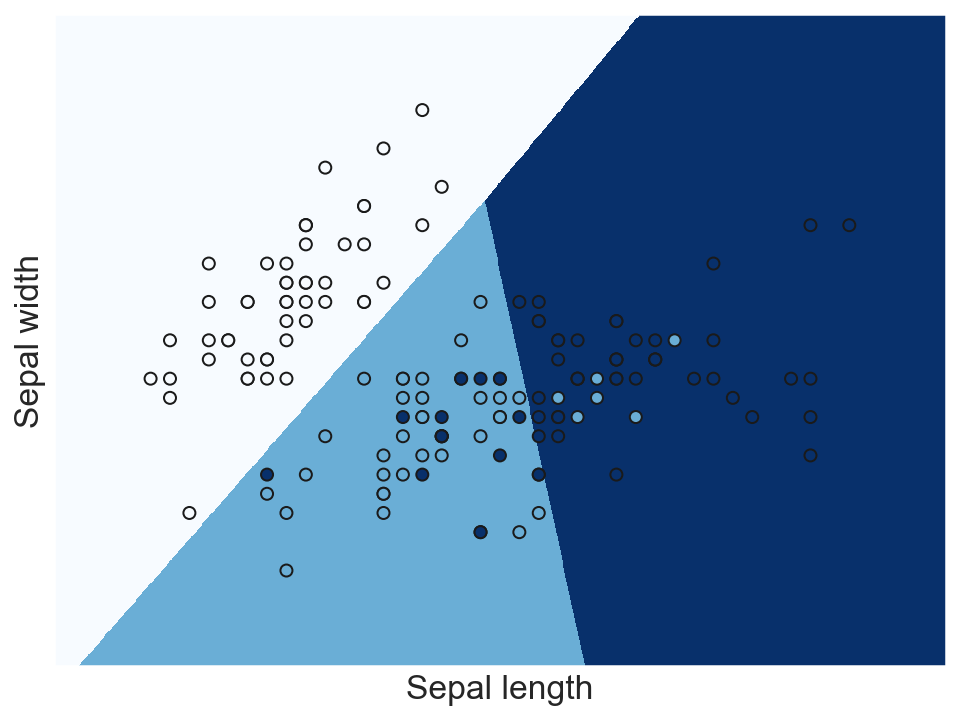

Softmax gives us a probability distribution across the classes: [[1.02167920e-15 9.38473885e-01 6.15261151e-02]]


In [3]:
def multi_class_logistic_regression_plot():
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # Take sepal length and sepal width features
    Y = iris.target
    logreg = LogisticRegression(
        C=1e5, solver='lbfgs', multi_class='multinomial')
    logreg.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    cmap = plt.cm.Blues
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .005  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=cmap)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

    print('Softmax gives us a probability distribution across the classes: {}'.format(
        logreg.predict_proba([[5, 2]])))


multi_class_logistic_regression_plot()

## Illustration of approaches

Plot decision surface of multinomial and One-vs-Rest Logistic Regression. The hyperplanes corresponding to the three One-vs-Rest (OVR) classifiers are represented by the dashed lines.

training score : 0.995 (multinomial)
training score : 0.976 (ovr)


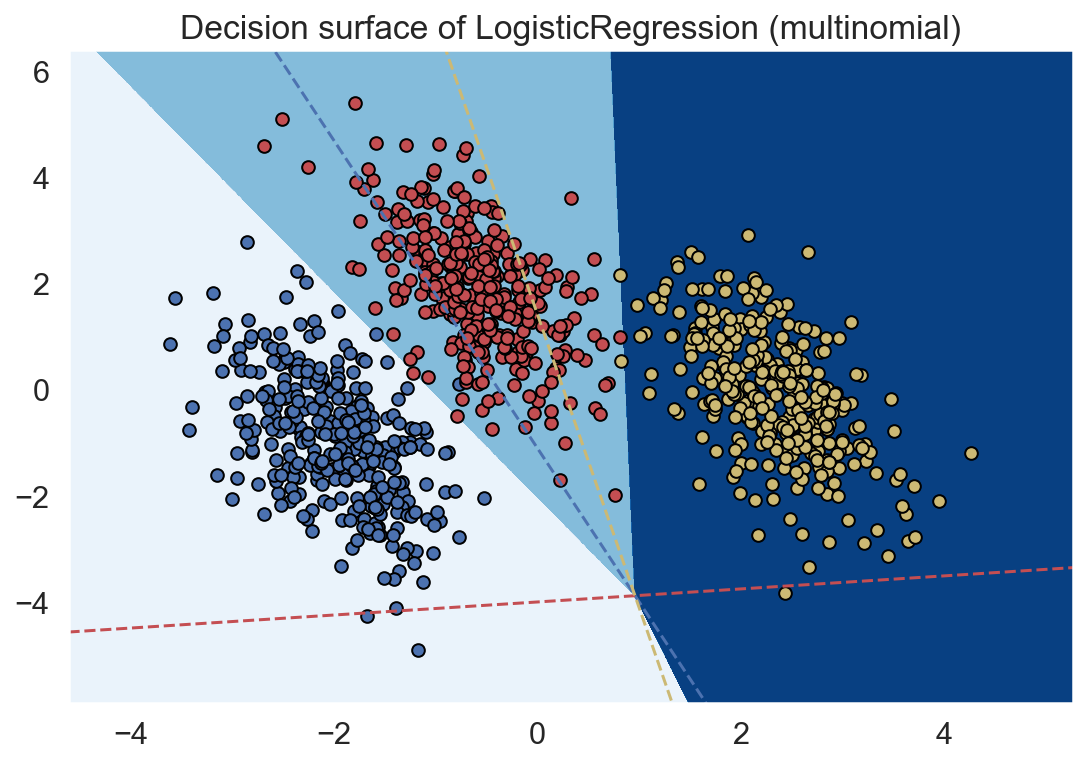

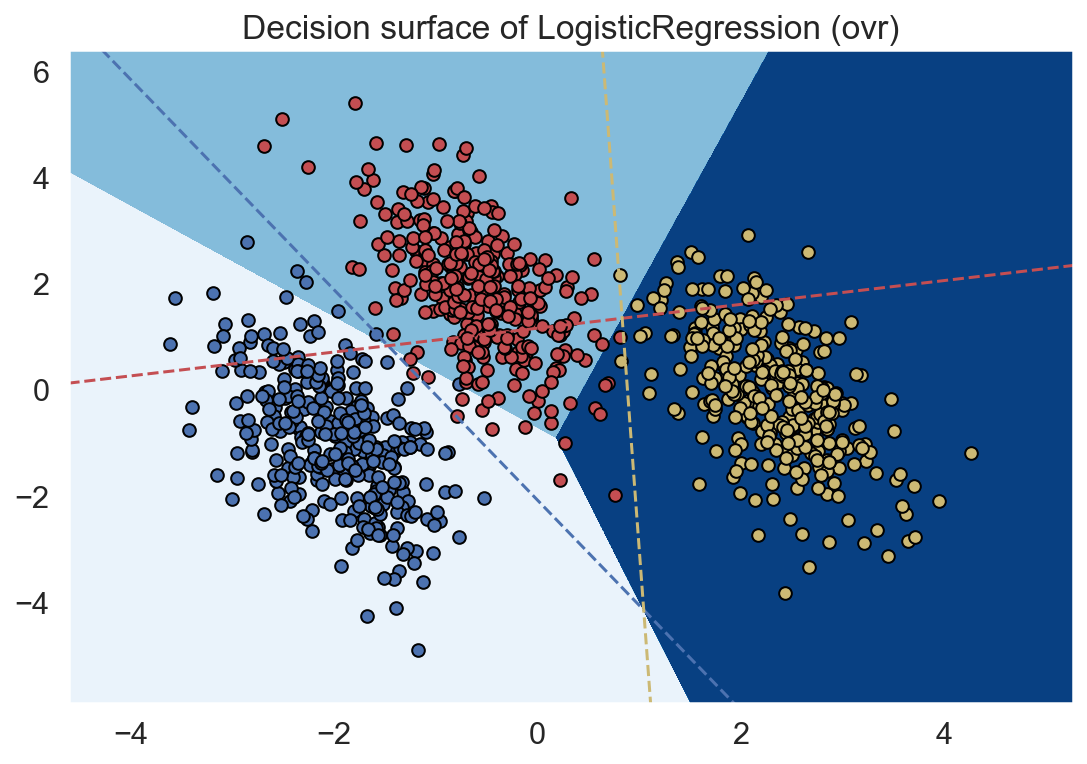

In [4]:
# Ref : https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html#sphx-glr-auto-examples-linear-model-plot-logistic-multinomial-py
from sklearn.datasets import make_blobs

def illustrate_multi_class_logisitic_regression():
    # make 3-class dataset for classification
    centers = [[-5, 0], [0, 1.5], [5, -1]]
    X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
    transformation = [[0.4, 0.2], [-0.4, 1.2]]
    X = np.dot(X, transformation)
    cmap = plt.cm.Blues

    for multi_class in ('multinomial', 'ovr'):
        clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                                 multi_class=multi_class).fit(X, y)

        # print the training scores
        print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

        # create a mesh to plot in
        h = .005  # step size in the mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(9, 6))
        plt.contourf(xx, yy, Z, cmap=cmap)
        plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
        plt.axis('tight')

        # Plot also the training points
        colors = "bry"
        for i, color in zip(clf.classes_, colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=cmap,
                        edgecolor='black', s=40)

        # Plot the three one-against-all classifiers
        xmin, xmax = plt.xlim()
        ymin, ymax = plt.ylim()
        coef = clf.coef_
        intercept = clf.intercept_

        def plot_hyperplane(c, color):
            def line(x0):
                return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
            plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                     ls="--", color=color)

        for i, color in zip(clf.classes_, colors):
            plot_hyperplane(i, color)

    plt.show()


illustrate_multi_class_logisitic_regression()

## Regularisation with Logistic Regression

Regularisation is fundamental in machine learning, and can help numerical stability solving for the model parameters.

Under the hood the following optomisation happens for the following selected regularisation ($L_2$ is default)

### $L_1$ regularisaiton `penalty='l1'`

$$ \min_{w, c} \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) $$


### $L_2$ regularisaiton `penalty='l2'`

$$ \min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) $$

### Elastic-Net regularization `penalty='elasticnet'`

$$ \min_{w, c} \frac{1 - \rho}{2}w^T w + \rho \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) $$

where $\rho$ controls the strength of $L_1$ regularization vs. $L_2$ regularization (it corresponds to the `l1_ratio` parameter).

The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied.

## Gradient Descent Solver

* `newton-cg` - A newton method (Nonlinear conjugate gradient method), slow for large datasets from computing second derivatives.
* `lbfgs` -  (Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm) A newton method, storing only the last few gradient evaluations, it approximates the second derivative (Hessian). Is the default solver.
* `liblinear` - Library for large linear classification, using coordinate descent. Can only solve multiclass OVR logistic regression.
* `sag` -  Stochastic Average Gradient Descent, incremental aggregated gradient that uses a random sample of the previous gradient values. Fast for big datasets.
* `saga` - (A Fast Incremental Gradient Method With Support for Non-Strongly Convex Composite Objectives) - Extension of SAG, that allows for $L_1$ regularisation. Should be the fastest to train.

# Gradient descent Optomisation (Overview)

A first-order iterative optimization algorithm for finding the local minimum of a differentiable function. Here we apply it to find the parameters of the model that minimise the models cost function for our dataset. To find a local minimum of the cost function $J(\bf{w})$ using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the cost function ($\nabla_{\bf{w}} J(\bf{w})$) at the current point.

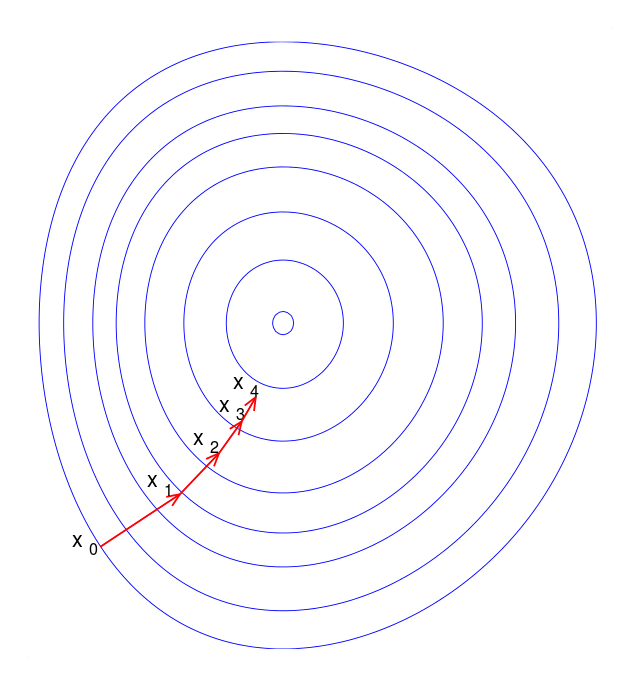

$$ \bf{w} \leftarrow \bf{w} - \eta (\alpha \frac{\partial R(\bf{w})}{\partial \bf{w}}
+ \frac{\partial J(\bf{w}, y_i)}{\partial \bf{w}}) $$

Where $R(\bf{w})$ is the regularisation term split out from the cost function here

And $\eta$ is the learning rate, which controls the step-size in the parameter space.

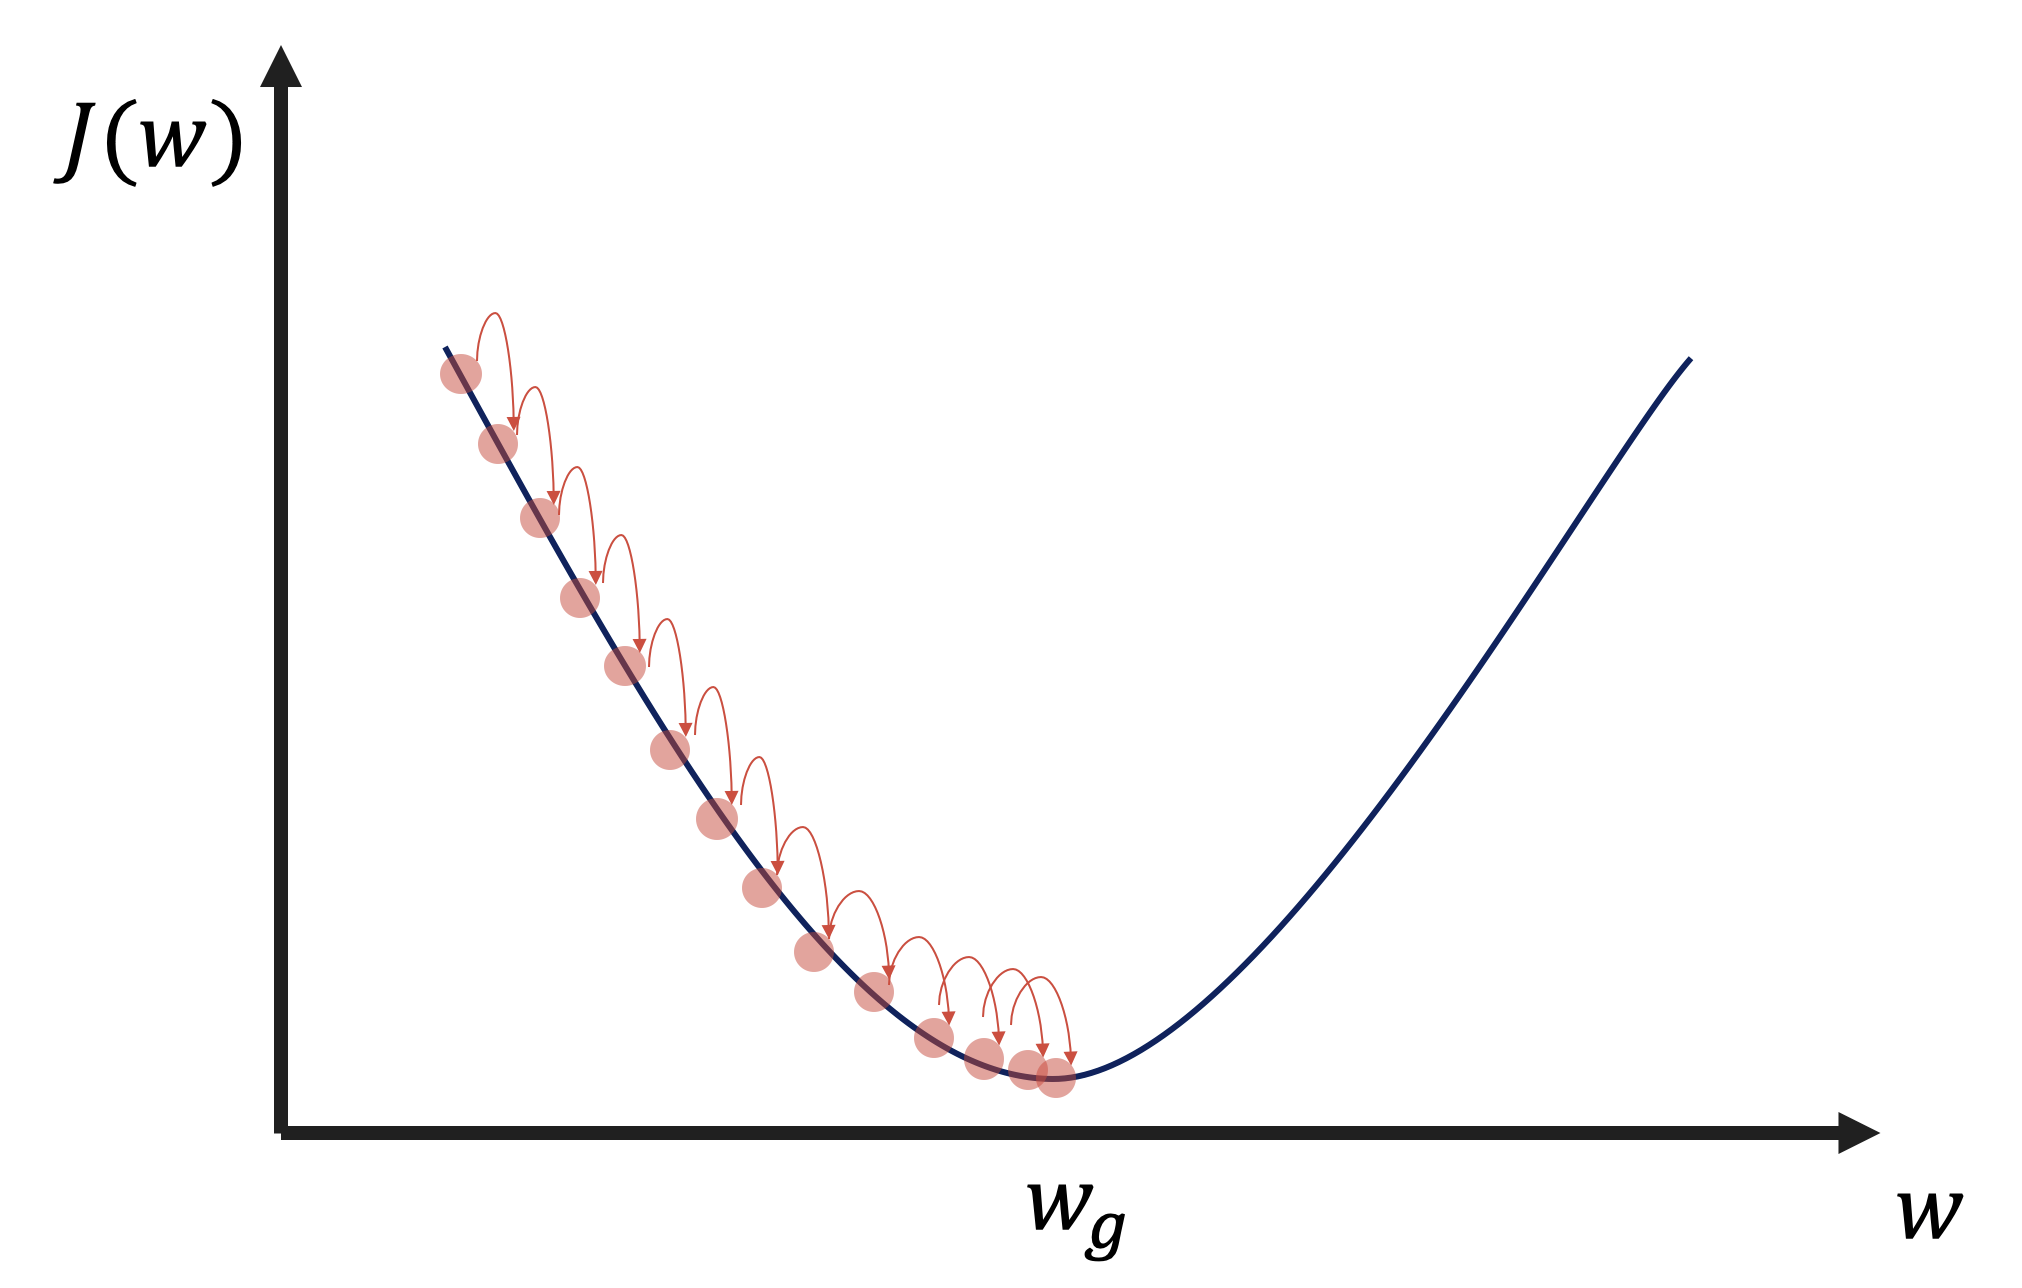

Gradient descent is often sensitive to the learning rate, and there are various methods on how to set it to ensure convergence to a local minima for the cost function optomisation. Note it also sensitive to different feature scales, so often we normalise all the features before using gradient descent.

### $\eta$ too small

Algorithm will take many iterations to converge, hence taking a long time and may hit its maximum number of iterations if it hasn't converged

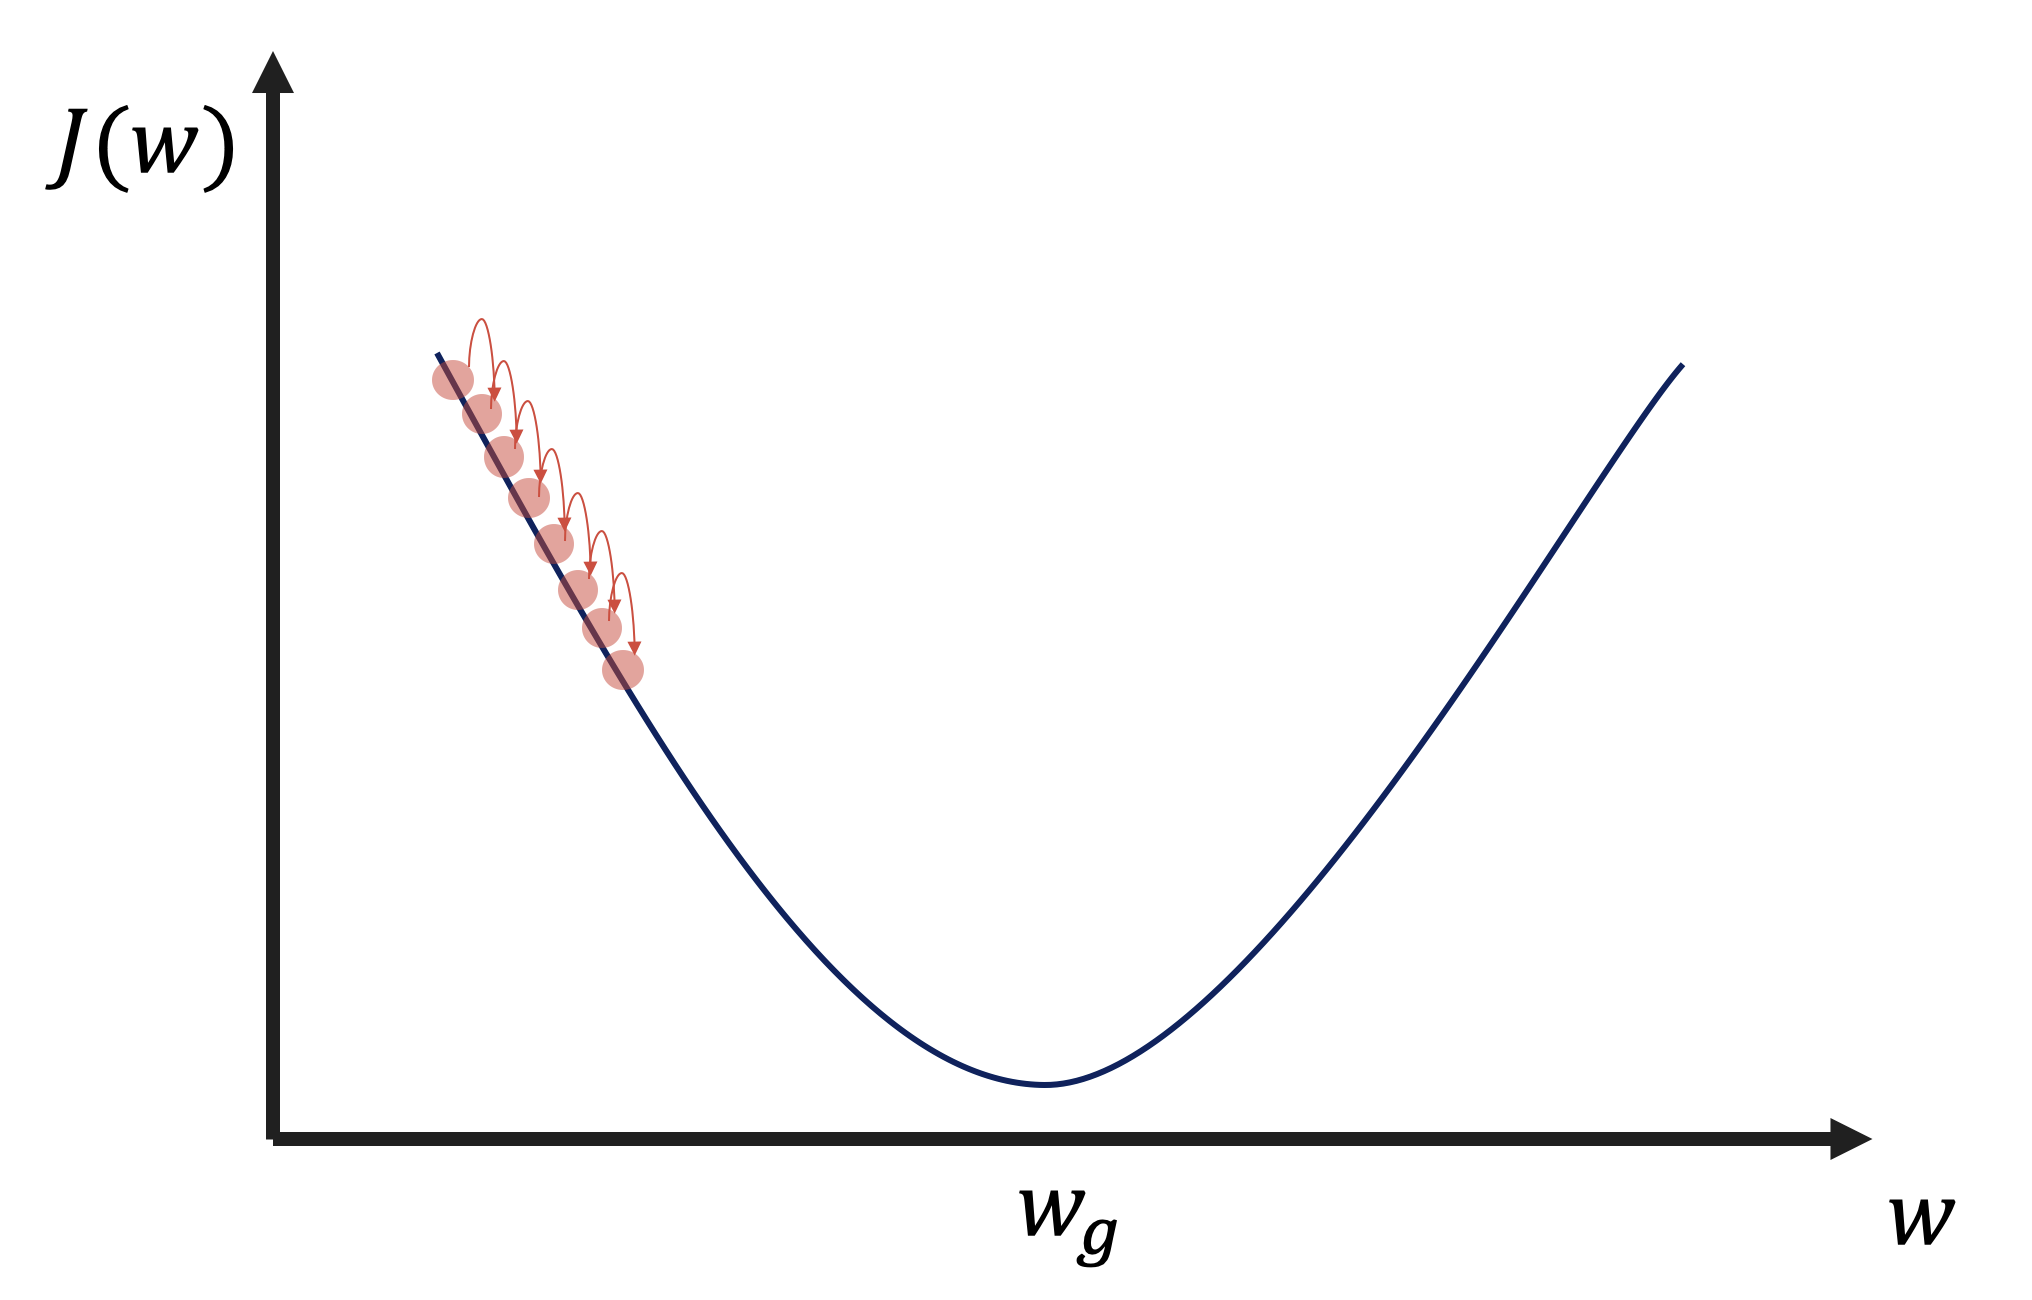

### $\eta$ too large

If it is too large, the algorithm might jump over the local minima and out of the valley, diverging away from a local minima.

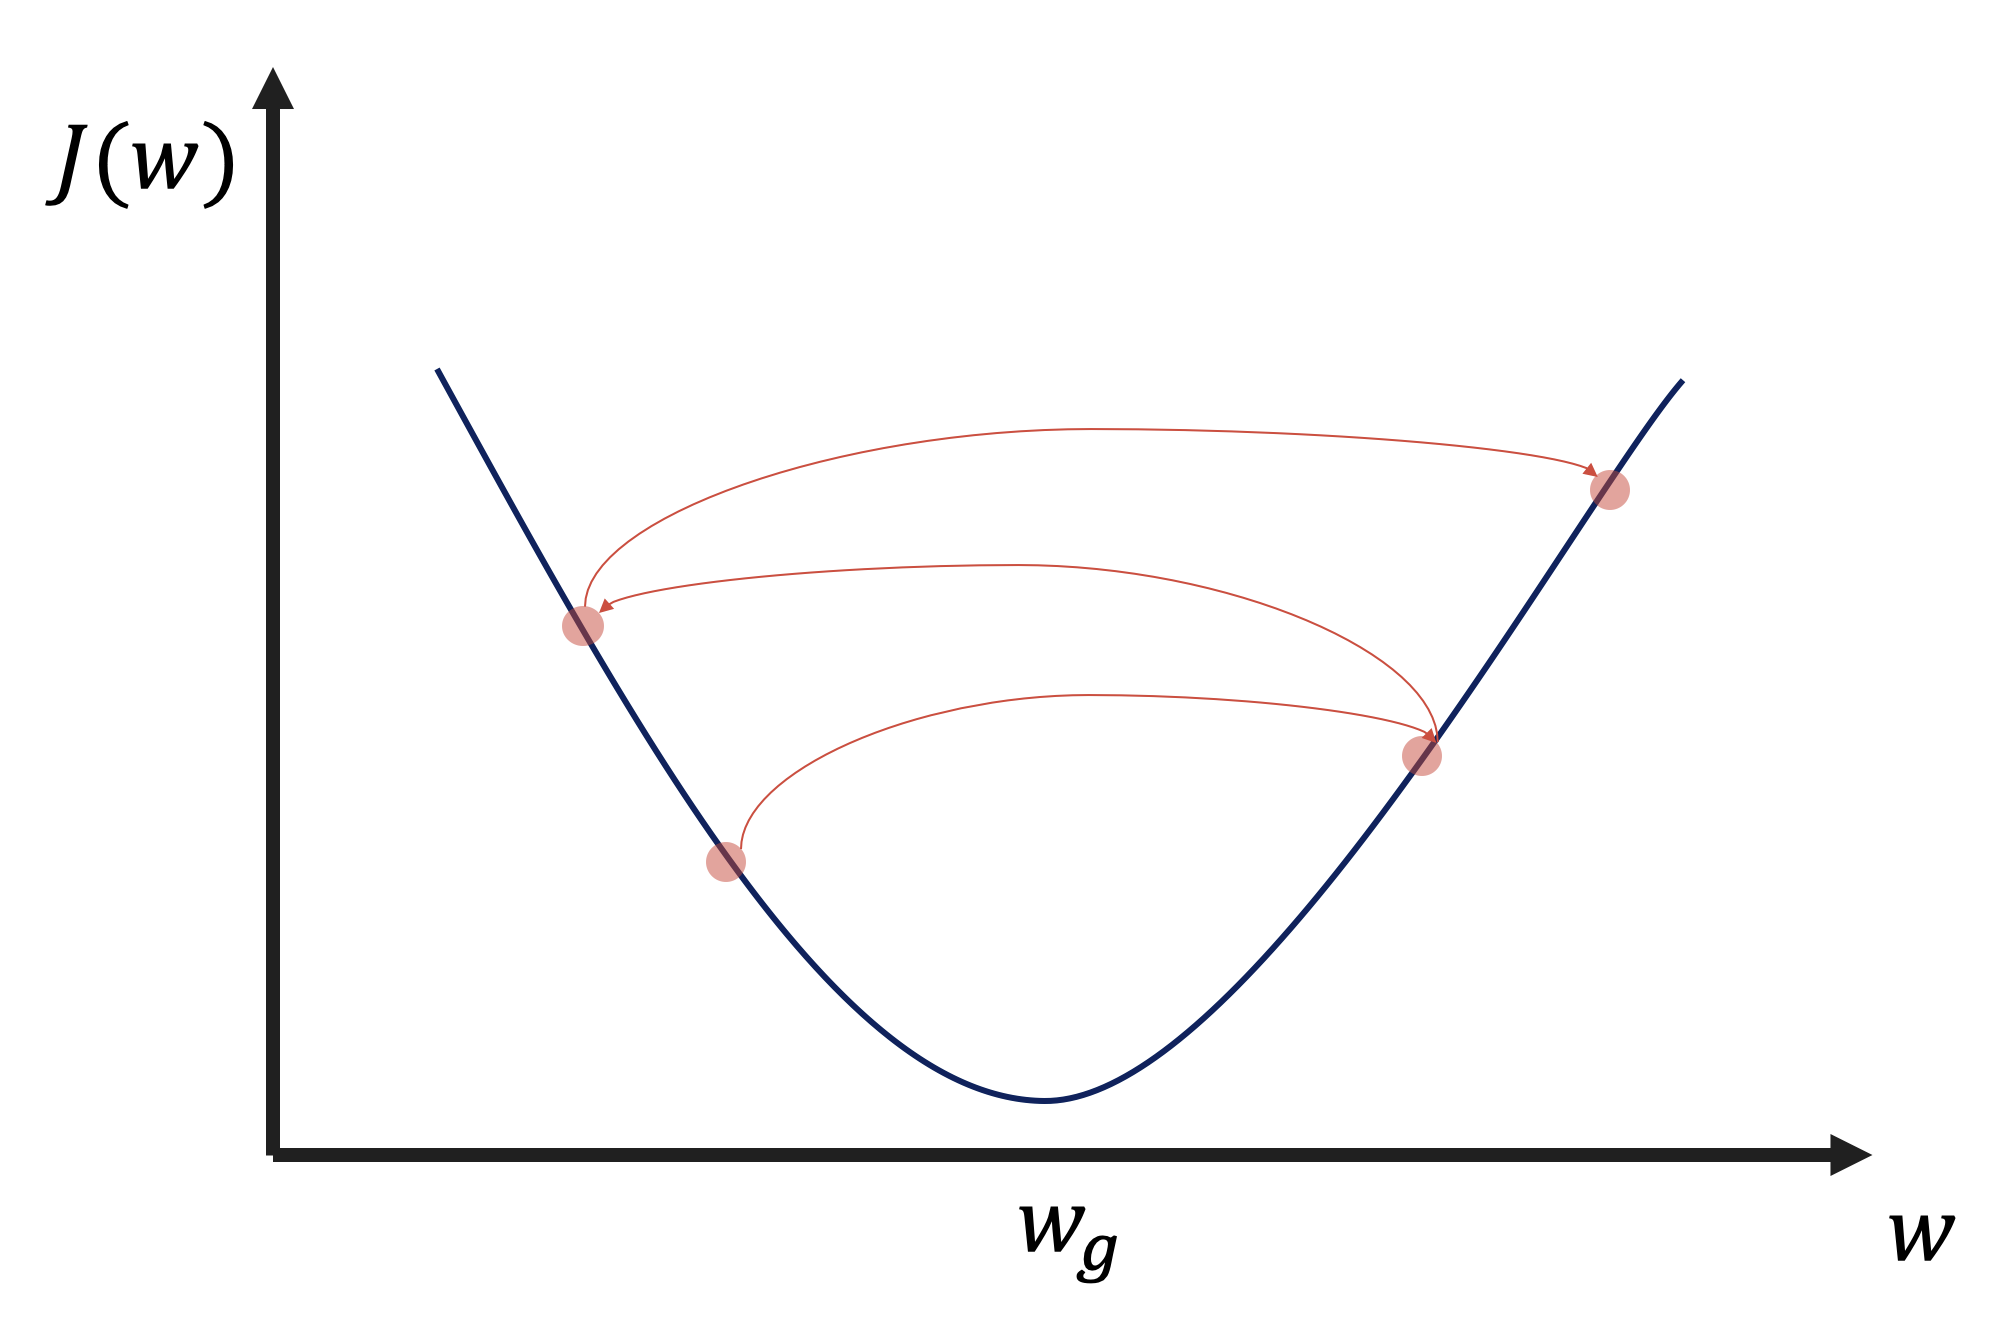

## Gradient Descent Variations

### 1. Batch Gradient Descent

Uses the entire dataset (Batch) for each iteration of the above parameter update equation, will descend and iterate towards the local minima. This variation is the slowest, when the dataset is large.

### 2. Stochastic Gradient Descent

Uses a randomly selected sample to compute the an approximation of the gradient with. This makes the iterations fastest, however due to randomness (stochastic) choice of the sample, the gradient iteration moves are somewhat random, and decrease only on average. Eventually the iterations will end up bouncing around the local minima, however will never settle down.

Due to the irregular iteration steps, it has a better chance of finding the global minima of the cost function rather than a local minima. One solution is to reduce gradually reduce the learning rate.

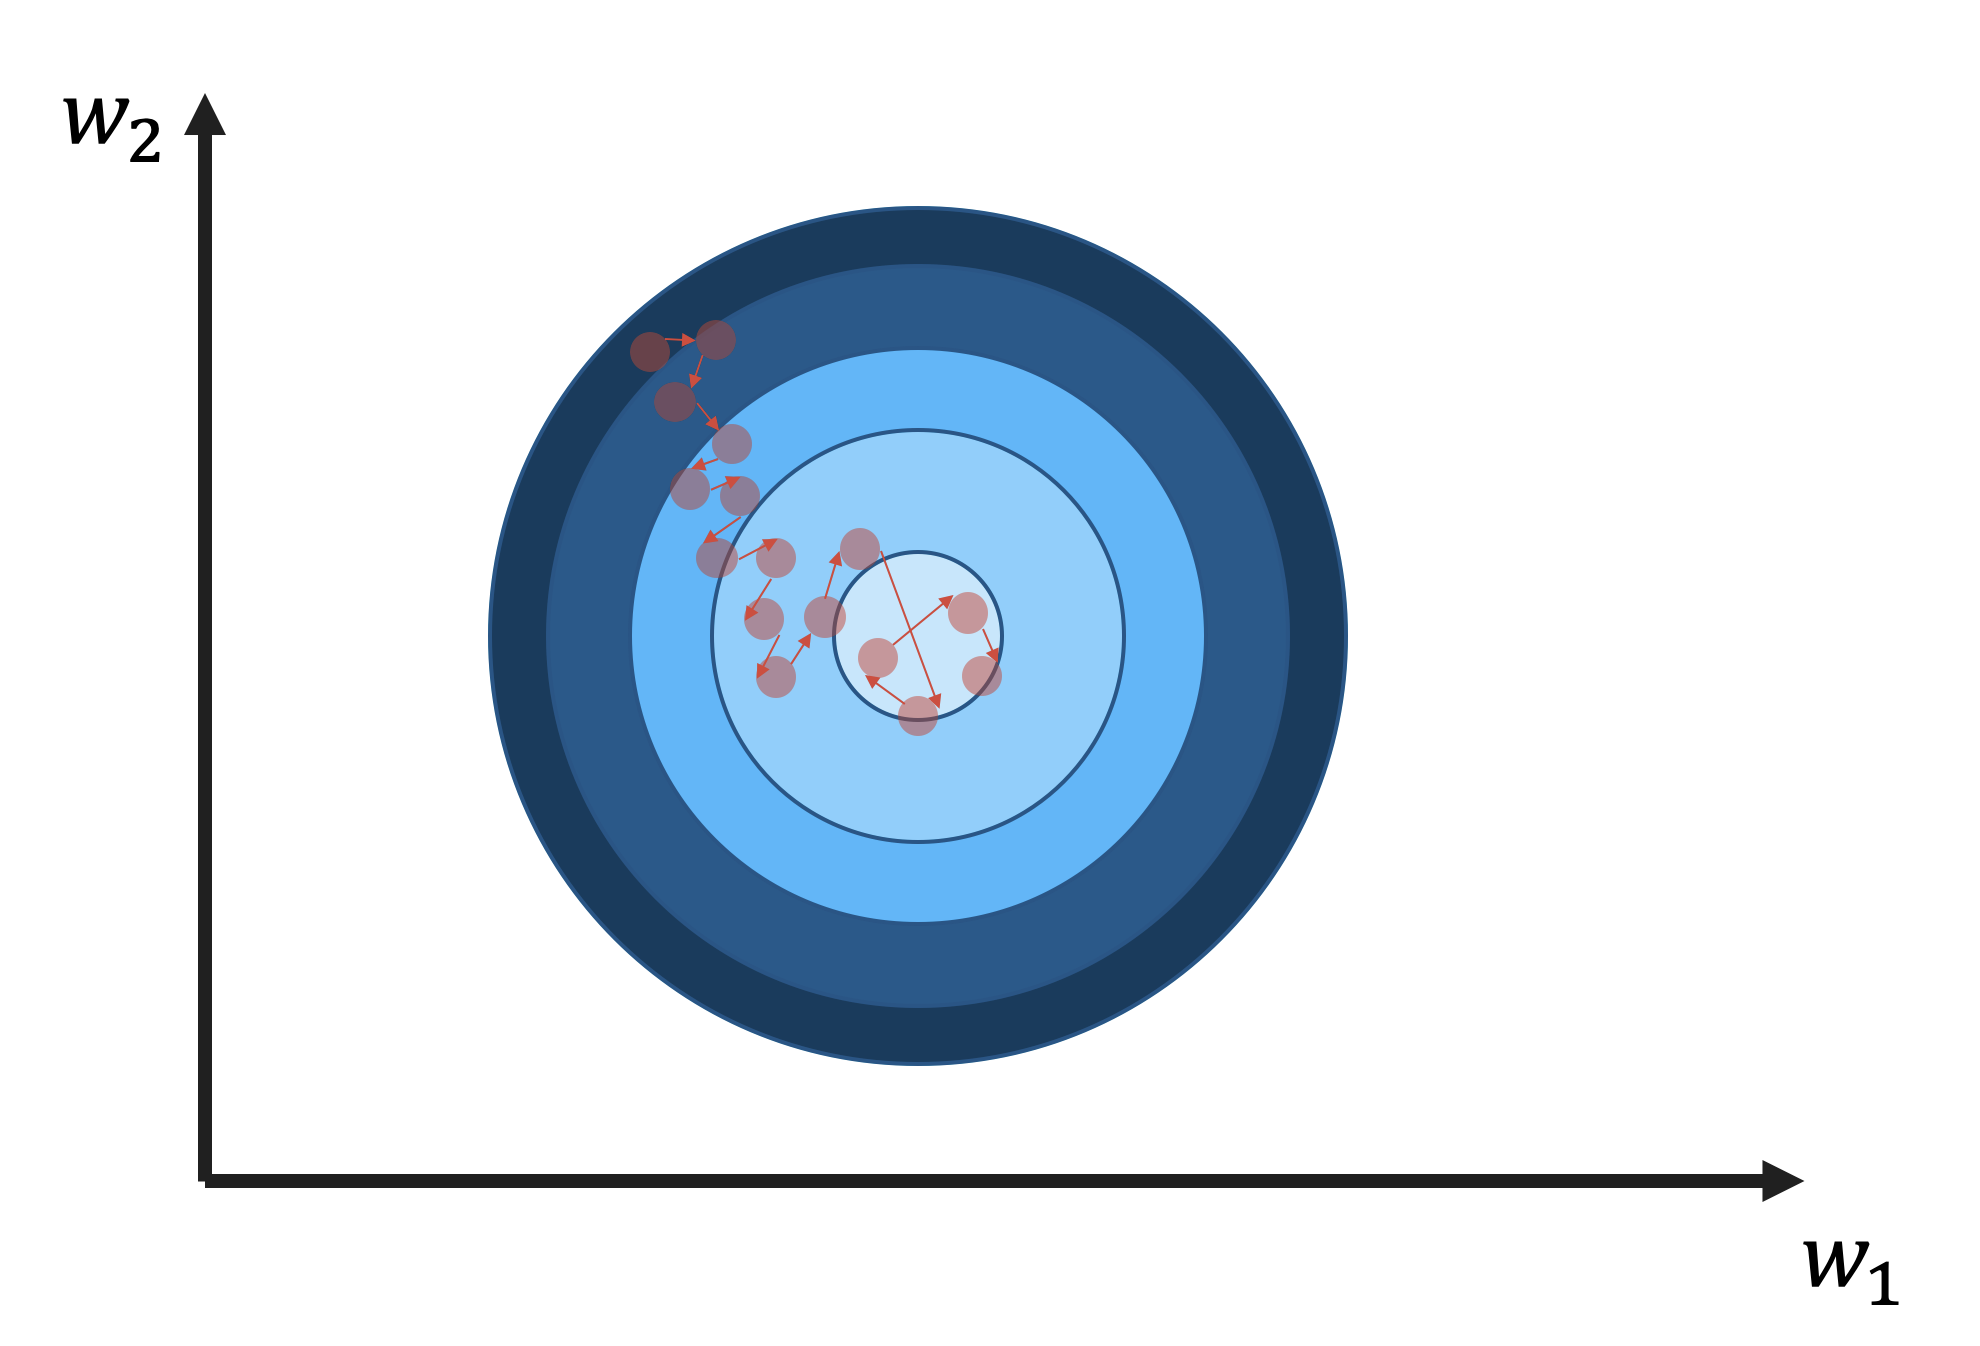

### 3. Mini-batch Gradient Descent

Similar to the above, however randomly selects a set of samples (*mini-batches*) to compute the approximation of the gradient with. This benefits from hardware optomistaion for matrix operations (when using GPU's). Somewhat smoother iteration steps.
